# HSE 2021: Mathematical Methods for Data Analysis

## Seminar 4: Linear Regression

**Authors**: Polina Polunina, Yury Kashnitsky, Maria Tikhonova, Eugeny Sokolov

Import packages:

In [43]:
%pip install wget
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [44]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#ulr links
import wget
#off the warnings
import warnings
warnings.filterwarnings("ignore")

## Simple Linear Regression
Simple Linear Regression - regression with one variable

Load the dataset:
* **SalePrice** - The property's sale price in dollars. This is the target variable that you're trying to predict
* **GrLivArea** - Above grade (ground) living area square feet


In [45]:
# store the web link in a variable
url = 'https://docs.google.com/uc?export=download&id=1k21iUIrz0NjfiLE_j-oBQm1bNu3wASX6'

# download the file and save its name to a viriable
filename = wget.download(url)

# print the filename
filename

'train_home_price (2).csv'

In [46]:
# loading the data from pc
data = pd.read_csv(filename, index_col=0, usecols=['Id', 'GrLivArea', 'SalePrice'])

Let's have a look into the data:

In [47]:
data.head()

,GrLivArea,SalePrice
Id,,
1,1710,208500
2,1262,181500
3,1786,223500
4,1717,140000
5,2198,250000


In [48]:
data.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


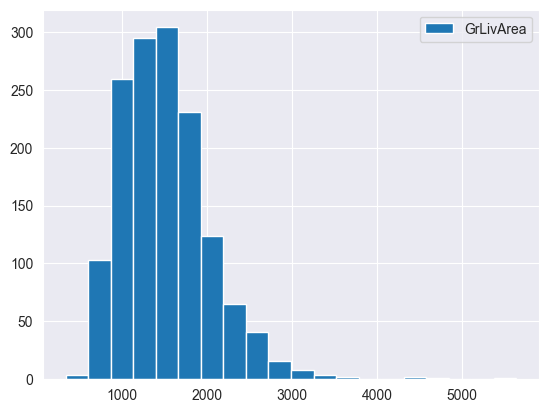

In [49]:
data.GrLivArea.hist(bins=20, label='GrLivArea')
plt.legend()
plt.show()

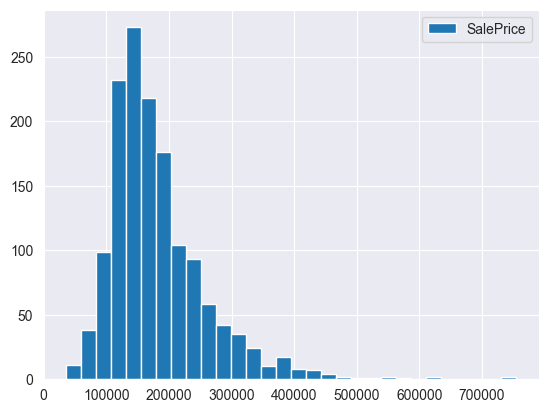

In [50]:
data.SalePrice.hist(bins=30, label='SalePrice')
plt.legend()
plt.show()

In [51]:
data.SalePrice.quantile(0.95)

326099.9999999999

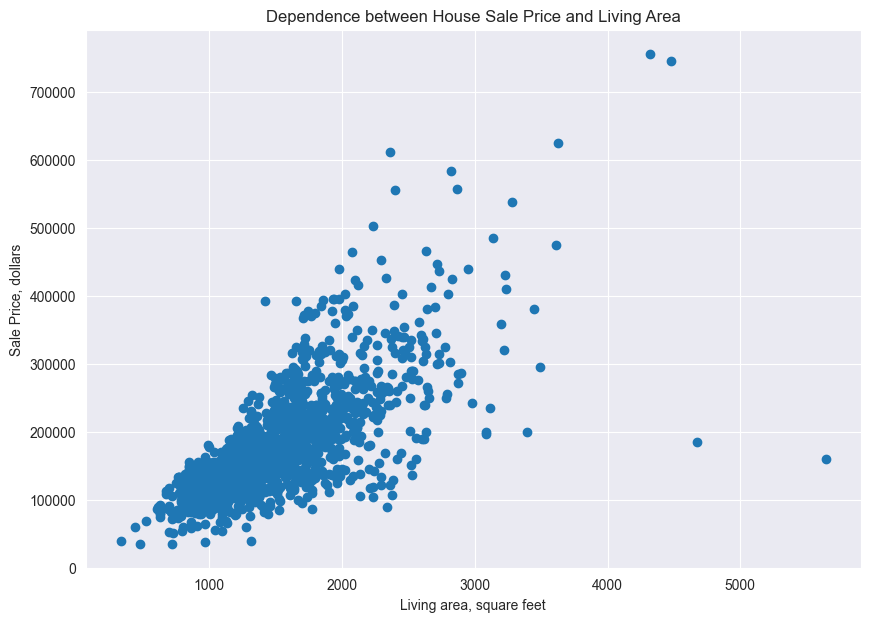

In [52]:
#set figsize of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(data.GrLivArea, data.SalePrice)
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area')
#show the plot
plt.show()

### How to model this dependence?

### Building a model

* Y = SalePrice - target, dependent variable
* X = GrLivArea - predictor, independent variable

**the model**

We want to find a line that reflects the dependence between Sale Price and Living area


$Y = a + bX + \epsilon$


In [53]:
X = data.GrLivArea
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [54]:
#plot the summary of our model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.502     
Dependent Variable: SalePrice        AIC:                36073.7610
Date:               2023-10-13 21:53 BIC:                36084.3334
No. Observations:   1460             Log-Likelihood:     -18035.   
Df Model:           1                F-statistic:        1471.     
Df Residuals:       1458             Prob (F-statistic): 4.52e-223 
R-squared:          0.502            Scale:              3.1442e+09
-------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|    [0.025    0.975]  
-------------------------------------------------------------------
const      18569.0259 4480.7545  4.1442 0.0000 9779.6119 27358.4399
GrLivArea    107.1304    2.7936 38.3482 0.0000  101.6504   112.6103
-------------------------------------------------------------------
Omnibus:             261.166       Durbin-Watson:          2.025   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       3432.287
Skew:                0.410         Prob(JB):               0.000   
Kurtosis:            10.467        Condition No.:          4897    
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

### What do all these stats mean?

* **const** - the found value for a
* **GrLivArea** - the found value for b

so that our model is **Y = 18569.0259 + 107.1304 * X**

**Hypothesis testing and *p-value***

$H_0$: coeff = 0 - null hypothesis

$H_1$: coeff $\neq$ 0 - alternative hypothesis

* If *p-value* $\leq$ alpha, then we **CAN** reject the null hypothesis and the coeff is called **significant**
* If *p-value* > alpha, then we **CAN NOT** reject the null hypothesis and the coeff is called **insignificant**
    
    
**How to choose a suitable alpha value?**

Alphas could be: 0.01, 0.05, 0.1 ...



<img src="https://drive.google.com/uc?id=1hOljO6iysu6VPtctoRjZVole2qEnTidB" width=70%>

<img src="https://drive.google.com/uc?id=1yEiawA_wtaPYIb6n1uEoV8bfw_6ZVTwx" width=70%>



What is the appropriate false positives and false negatives level?

The most common alpha for coeffs = 0.05

#### How well this relation reflects the dependence?
**Y = 18569.0259 + 107.1304 * X**



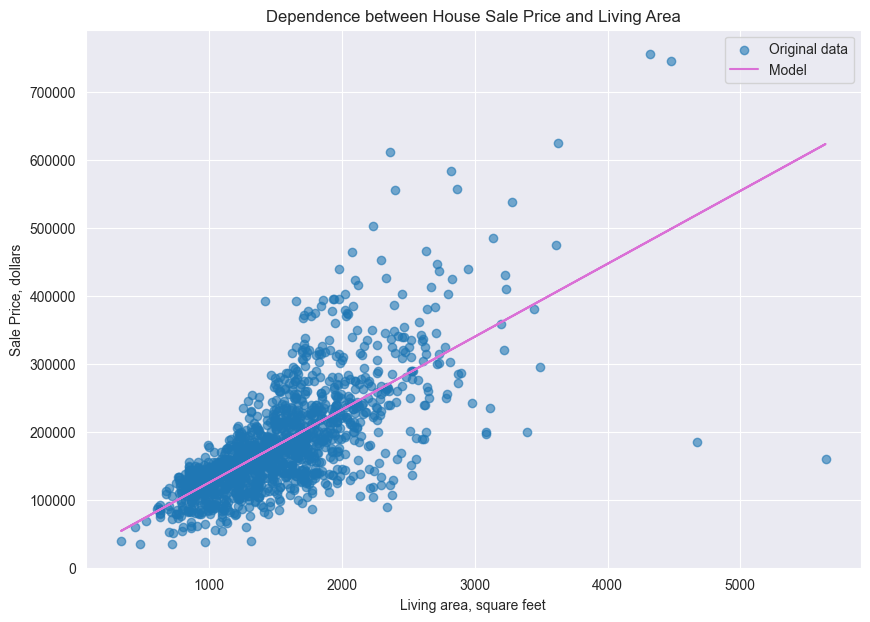

In [55]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(data.GrLivArea, data.SalePrice, alpha=0.6, label = 'Original data')
#plot of the found regression line
plt.plot(data.GrLivArea.values, 18569.0259 + 107.1304 * data.GrLivArea.values, color = 'orchid', label='Model')
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area')
plt.legend()
#show the plot
plt.show()

#### $R^2$ and Regression Performance

Another recall from you statistics course =)

$R^2$ is the **coefficient of determination**, the most common performance metric for regression problems

In case of linear regression, $R^2$ is defined in the following way:

* $y_i$ - observed target data
* $\hat{y_i}$ - predicted data
* $\overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$ - mean of the observed data
* $SS_{tot} = \sum_{i}(y_i - \overline{y})^2$ - total sum of squares
* $SS_{reg} = \sum_{i}(\hat{y_i} - \overline{y})^2$ - explained sum of squares
* $SS_{res} = \sum_{i}(y_i - \hat{y_i})^2 = \sum_{i}residual_i^2$ - residual sum of squares

$R^2 = \frac{SS_{reg}}{SS_{tot}} = 1 - \frac{SS_{res}}{SS_{tot}}$ - the ratio of the explained variance

$R^2$ range is [0, 1]

In our model, $R^2 = 0.502$, so only a half of the variance is explained

**Note:** $R^2$ is biased (!) and we should look into $R^2_{adjusted}$

### Can we do better?

Let's take logarithms from X and Y, so that our model is **$ln(Y) = a + b*ln(X) + \epsilon$**

In [56]:
X = data.GrLivArea
Y = data.SalePrice
X=np.log(X)
Y=np.log(Y)
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [57]:
#plot the summary of our model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.533    
Dependent Variable: SalePrice        AIC:                354.1941 
Date:               2023-10-13 21:53 BIC:                364.7664 
No. Observations:   1460             Log-Likelihood:     -175.10  
Df Model:           1                F-statistic:        1666.    
Df Residuals:       1458             Prob (F-statistic): 1.60e-243
R-squared:          0.533            Scale:              0.074523 
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const         5.6681     0.1559   36.3601   0.0000   5.3623   5.9739
GrLivArea     0.8745     0.0214   40.8151   0.0000   0.8325   0.9166
------------------------------------------------------------------
Omnibus:             111.954       Durbin-Watson:          2.022  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       184.755
Skew:                -0.565        Prob(JB):               0.000  
Kurtosis:            4.327         Condition No.:          162    
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

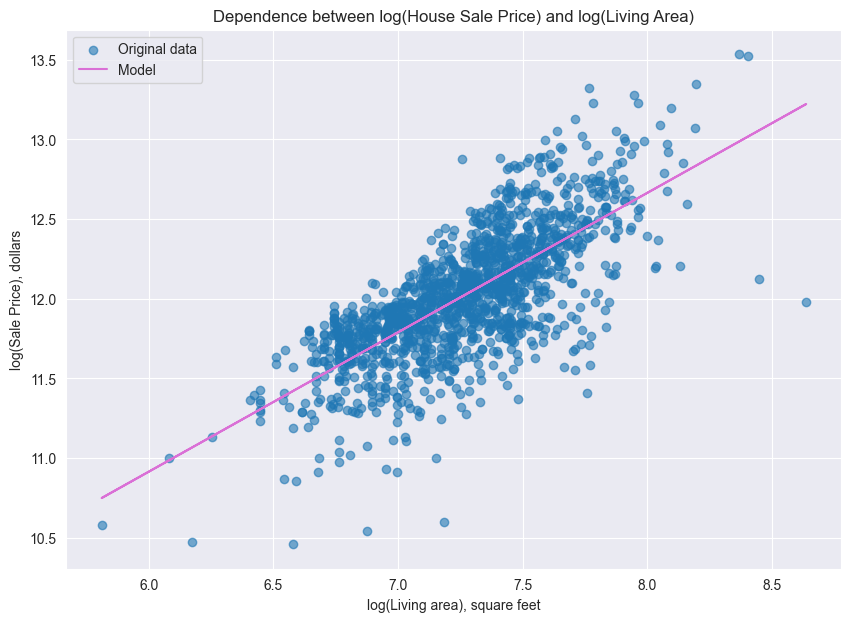

In [58]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(np.log(data.GrLivArea), np.log(data.SalePrice), alpha=0.6, label = 'Original data')
#plot of the found regression line
plt.plot(np.log(data.GrLivArea.values), 5.6681 + 0.8745 * np.log(data.GrLivArea.values), color = 'orchid', label='Model')
#text for x axis
plt.xlabel('log(Living area), square feet')
#text for y axis
plt.ylabel('log(Sale Price), dollars')
#text for the plot title
plt.title('Dependence between log(House Sale Price) and log(Living Area)')
plt.legend()
#show the plot
plt.show()

## Multiple Linear Regression

In [59]:
cols=['Id', 'MSSubClass', 'LotArea', 'OverallQual',\
      'OverallCond', 'YearBuilt', 'YearRemodAdd',\
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',\
     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [60]:
data = pd.read_csv(filename, index_col=0, usecols=cols)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


Check for Nan values:

In [61]:
data.isna().sum().sum()

0

### Define the model

In [62]:
X = data.drop('SalePrice', axis=1)
print(X)
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                             
1             60     8450            7            5       2003          2003   
2             20     9600            6            8       1976          1976   
3             60    11250            7            5       2001          2002   
4             70     9550            7            5       1915          1970   
5             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1456          60     7917            6            5       1999          2000   
1457          20    13175            6            6       1978          1988   
1458          70     9042            7            9       1941          2006   
1459          20     9717            5            6       1950          1996   
1460          20     9937            5  

Calculate some statistical parameters:

In [63]:
#together with the intercept
k = X.shape[1]
#total number of observations
n = X.shape[0]
#degrees of freedom for the model:
df_model = k - 1
#degrees of freedom of the error:
df_error = n - k
print(' the number of paraters to estimate: {} \n total number of observations: {} \n degrees of freedom of the model: {} \n degrees of freedom of the errors: {}'\
      .format(k, n, df_model, df_error))

 the number of paraters to estimate: 31 
 total number of observations: 1460 
 degrees of freedom of the model: 30 
 degrees of freedom of the errors: 1429


Calculate the rank of feature matrix:

In [64]:
np.linalg.matrix_rank(X)

30

In [65]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.804     
Dependent Variable:      SalePrice            AIC:                    34737.9309
Date:                    2023-10-13 21:53     BIC:                    34896.5166
No. Observations:        1460                 Log-Likelihood:         -17339.   
Df Model:                29                   F-statistic:            207.6     
Df Residuals:            1430                 Prob (F-statistic):     0.00      
R-squared:               0.808                Scale:                  1.2357e+09
--------------------------------------------------------------------------------
                 Coef.      Std.Err.      t    P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------
const         608246.1995 1428003.7488  0.4259 0.6702 -2192960.6498 3409453.0488
MSSubClass      -161.5055      26.4469 -6.1068 0.0000     -213.3845    -109.6266
LotArea            0.3868       0.1016  3.8079 0.0001        0.1875       0.5860
OverallQual    18012.7658    1194.9364 15.0742 0.0000    15668.7495   20356.7821
OverallCond     4425.5378    1031.1020  4.2920 0.0000     2402.9031    6448.1725
YearBuilt        349.4880      61.2239  5.7084 0.0000      229.3896     469.5863
YearRemodAdd     140.9941      66.3557  2.1248 0.0338       10.8292     271.1590
BsmtUnfSF         -9.7412       3.1432 -3.0991 0.0020      -15.9070      -3.5754
TotalBsmtSF       20.5078       4.5849  4.4729 0.0000       11.5140      29.5016
1stFlrSF          18.9417       6.1645  3.0727 0.0022        6.8492      31.0341
2ndFlrSF          19.5079       5.7011  3.4218 0.0006        8.3244      30.6914
LowQualFinSF      -6.7807      14.8869 -0.4555 0.6488      -35.9831      22.4218
GrLivArea         31.6689       5.7075  5.5486 0.0000       20.4729      42.8650
BsmtFullBath    8400.0052    2512.7996  3.3429 0.0009     3470.8365   13329.1738
FullBath        3414.1786    2838.1391  1.2030 0.2292    -2153.1840    8981.5413
HalfBath       -1549.1048    2690.0026 -0.5759 0.5648    -6825.8793    3727.6697
BedroomAbvGr  -10546.9569    1704.6005 -6.1873 0.0000   -13890.7426   -7203.1712
KitchenAbvGr  -12589.7919    5254.5163 -2.3960 0.0167   -22897.1787   -2282.4051
TotRmsAbvGrd    5095.3485    1250.1490  4.0758 0.0000     2643.0258    7547.6713
Fireplaces      3707.1220    1784.0235  2.0780 0.0379      207.5382    7206.7058
GarageCars     10562.3784    2884.3767  3.6619 0.0003     4904.3150   16220.4418
GarageArea         2.1462       9.7916  0.2192 0.8265      -17.0613      21.3537
WoodDeckSF        25.7208       8.0357  3.2008 0.0014        9.9578      41.4838
OpenPorchSF       -6.2873      15.3029 -0.4109 0.6812      -36.3058      23.7312
EnclosedPorch      6.6916      17.0190  0.3932 0.6942      -26.6932      40.0765
3SsnPorch         21.6727      31.6870  0.6840 0.4941      -40.4854      83.8308
ScreenPorch       55.1441      17.3306  3.1819 0.0015       21.1479      89.1403
PoolArea         -42.4124      23.8035 -1.7818 0.0750      -89.1059       4.2810
MiscVal           -0.8946       1.8753 -0.4770 0.6334       -4.5731       2.7840
MoSold          -111.5227     348.4163 -0.3201 0.7490     -794.9846     571.9391
YrSold          -817.2240     709.7266 -1.1515 0.2497    -2209.4410     574.9931
--------------------------------------------------------------------------------
Omnibus:               540.774        Durbin-Watson:           1.961            
Prob(Omnibus):         0.000          Jarque-Bera (JB):        95836.983        
Skew:                  -0.553         Prob(JB):                0.000            
Kurtosis:              42.676         Condition No.:           13129423541445022
================================================================================
Notes:


**Resuls explanation:**

* $R^2 = 0.808$
* $R^2_{adj} = 0.804$
* Log-Likelihood = -1733 - A value of Likelihood function in the optimal point
* AIC = 34738 - Akaike information criterion, is used for model selection purposes. Preferred model is the one with the minimum AIC value
* BIC = 34897 - Bayesian information criterion, the same purposes as for AIC
* F-statistic = 208

**F- Test for the overall model significance**:

$H_{0}$ : The fit of intercept only model and the current model is same. i.e. Additional variables do not provide value taken together

$H_{1}$ : The fit of intercept only model is significantly less compared to our current model. i.e. Additional variables do make the model significantly better.

$F = \frac{R^2/(k-1)}{(1-R^2)/(n-k)}$,

where $k$ - the number of variables (with intercept term), $n$ - the number of observations


If the calculated F-value is greater than the F value from the statistical table, than we can reject the $H_{0}$ hypothesis

* Prob(F-statistic) = 0.0 - P-value for F-test
* Df model - degrees of freedom of the model
* Df Residuals - degrees of freedom of the errors

**Note:** don't be confused with the values of Df (!). THe true values is calculated above. In this specific realization of OLS, DF model is calculated as a rank of the X matrix, which equals to 29

* Scale - squared standard error of the regression

* Durbin-Watson = 1.96; DW is a test for autocorrelation of the errors. DW value always lies between 0 and 4. If , DW << 2 there is a positive serial correlation, if DW >> 2 - there is a negative correlation


**Note:** not all the variables are significant. What should we do next? There is a number of methods (a.k.a. Feature engineering):

* **Elimination by P-value:**

Build a model using a full set of features. Then, eliminate the insignificant features sequentially starting from the one with the highest P-value

* **Forward elimination:**

Build all possible regression models with a single predictor and pick the best one. Then try all possible models that include that best predictor plus a second predictor. Pick the best of those. You keep adding one feature at a time, and you stop when your model no longer improves or starts worsening.

* **Backward elimination:**

Build a regression model that includes a full set of predictors. Next, gradually remove one at a time according to the predictor whose removal makes the biggest improvement. You stop removing predictors when the removal makes the predictive model worsen.

### Task 1:

* Find collinear variables and leave only one of them

### Task 2: Implement feature elimination by P-value

**Hints**:
    * use cycles
    * look to the score values (Note: R^2 is biased) and P-values of the corresponding coefficients
    * constant term should be included
    
**Note:** The insignificant variable in a model could become significant in another model and vice versa

**Note 2:** Two estimated models with different features are two distinct models (!)

## Multiple regression with sklearn

* [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) &mdash; "classical" linear regression with MSE. Exact solution: $w^* = (X^TX)^{-1}X^Ty$
* [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) &mdash; linear regression with MSE optimization and $\ell_2$-regularization
* [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) &mdash; linear regression with MSE optimization and $\ell_1$-regularization

## Regularization

* Insert additional requirement for regularizer $R(\beta)$ to be small:
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda R(\beta)\to\min_{\beta}
$$
* $\lambda>0$ - hyperparameter.
* $R(\beta)$ penalizes complexity of models.
$$
\begin{array}{ll}
R(\beta)=||\beta||_{1} &  \mbox{(L1) Lasso regression}\\
R(\beta)=||\beta||_{2}^{2} & \text{(L2) Ridge regression}
\end{array}
$$

<img src="https://drive.google.com/uc?id=1WIONg5WAtiV4jKjmOA2Zn_B4uPAVPp6y" width=70%>

* Not only **accuracy** matters for the solution but also **model simplicity**!
* $\lambda$ controls complexity of the model:$\uparrow\lambda\Leftrightarrow\text{complexity}$$\downarrow$.


### Types of regularization: Ridge regression

Ridge regression minimizes a slightly different function:

$$\Large J(X, y, \beta) = \mathcal{L} + \lambda \sum_j\beta_j^2$$

- $\mathcal{L}$ is the logistic loss function summed over the entire dataset
- $\lambda \sum_j\beta_j^2$ is calles $l_2$ penalty


where $\lambda ≥ 0$ is a tuning parameter, to be determined separately. As with least squares, ridge regression seeks coefficient estimates that fit the data well, by making the RSS small. However, the second term, $\lambda |\beta|^2$ , called a *shrinkage penalty*, is small when betas are close to zero, and so it has the effect of shrinking penalty the estimates of $\beta_j$ towards zero. The tuning parameter $\lambda$ serves to control
the relative impact of these two terms on the regression coefficient estimates. When $\lambda = 0$, the penalty term has no effect, and ridge regression will produce the least squares estimates. However, as $\lambda$ increases the impact of the shrinkage penalty grows, and the ridge regression coefficient estimates will approach zero.

### Types of Regularization: Lasso regression

Ridge regression does have one obvious disadvantage. It does not do feature selection. Ridge regression
will include all p predictors in the final model. The penalty $\lambda |\beta|^2$ will shrink all of the coefficients towards zero, but it will not set any of them exactly to zero. This may not be a problem for prediction accuracy, but it can create a challenge in model interpretation in settings in which the number of variables p is quite large.

The lasso is an alternative to ridge regression that overcomes this disadvantage. The lasso minimizes the following function:


$$\Large J(X, y, \beta) = \mathcal{L} + \lambda \sum_j|\beta_j|$$

- $\mathcal{L}$ is the logistic loss function summed over the entire dataset
- $\lambda \sum_j|\beta_j|$ is calles $l_1$ penalty

The lasso and ridge regression have similar formulations. The only difference is that the $\lambda\sum_j\beta_j^2 $ term in the ridge regression penalty has been replaced by $\lambda\sum_j|\beta_j|$ in the lasso penalty.

As with ridge regression, the lasso shrinks the coefficient estimates towards zero. However, in the case of the lasso, the penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when
the tuning parameter $\lambda$ is sufficiently large. Hence, much like best subset selection, the lasso performs *variable selection*.

In [66]:
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


#### L2 regularization

In [67]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('SalePrice', axis=1), data.SalePrice, \
                                                    test_size=0.33, random_state=42)

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1614154736.5663
Train MSE = 1118176485.6748


### Cross-Validation



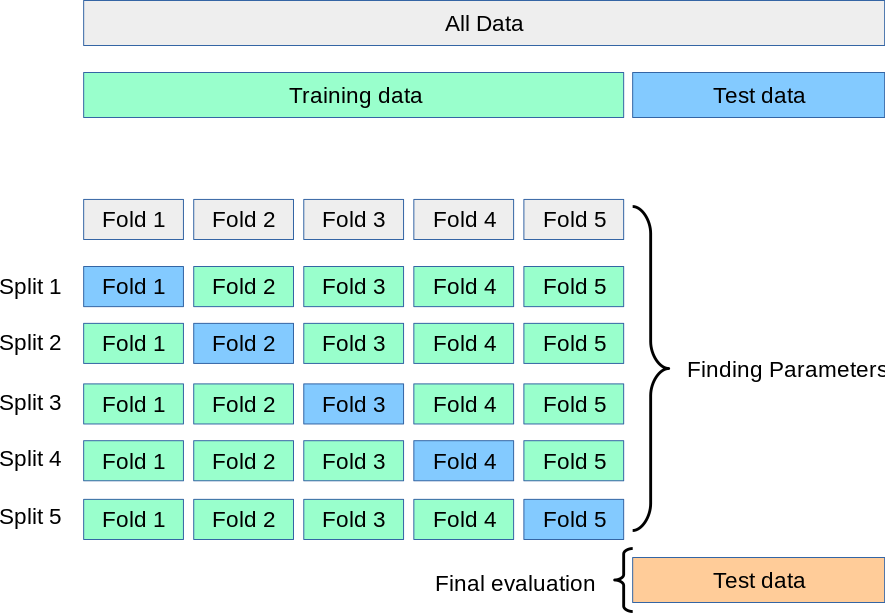

In [68]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 1479384499.2952
	2503090058.5411
	1201178649.8985
	694202047.1882
	2348370475.1935
Mean CV MSE = 1645245146.0233


In [69]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

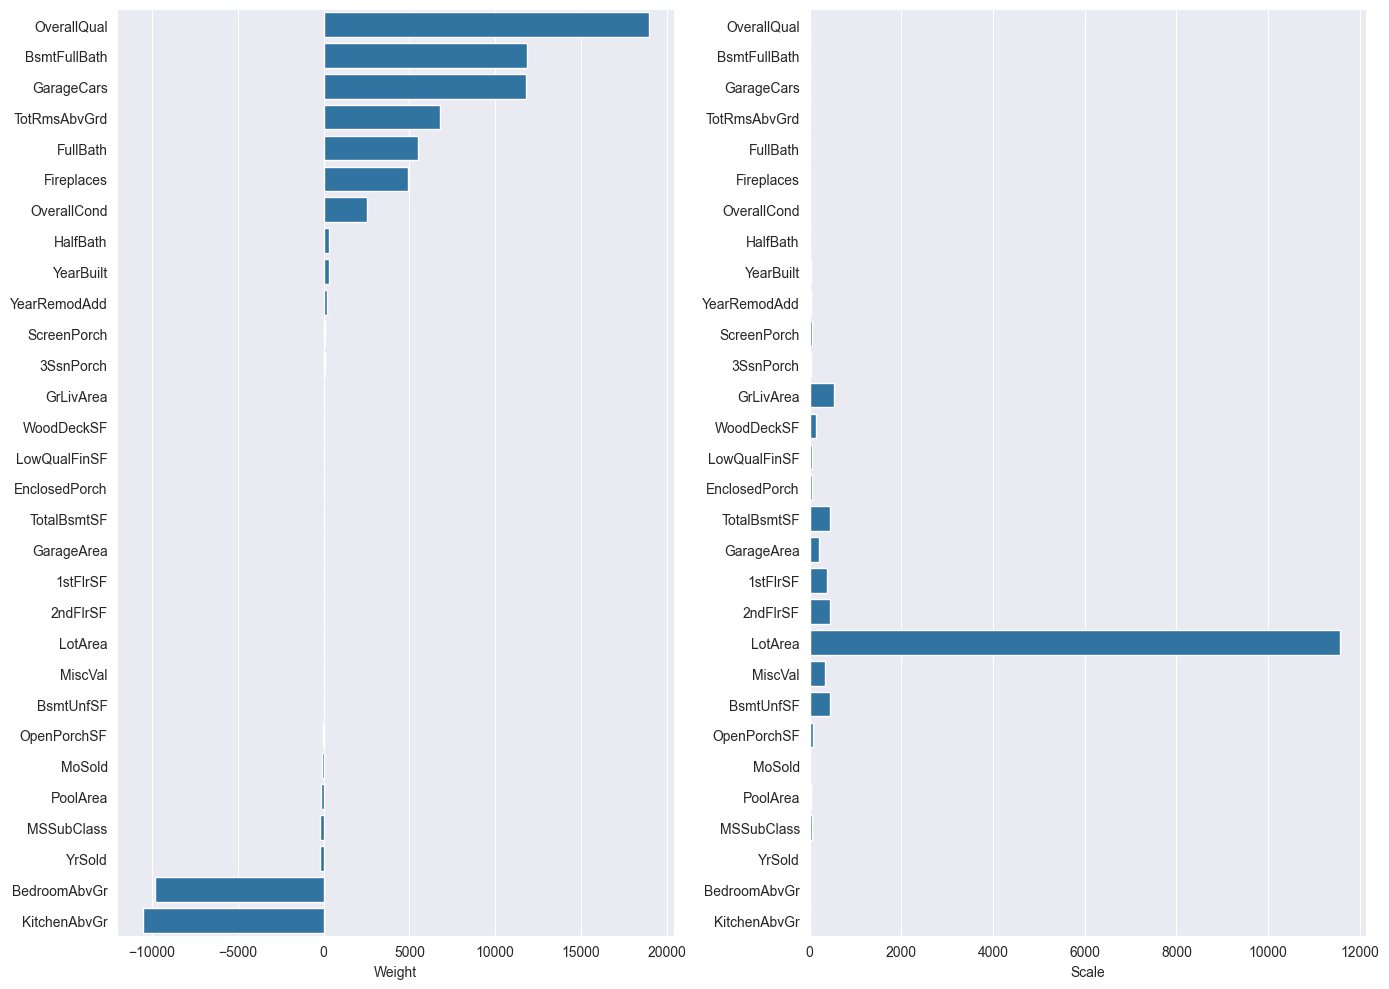

In [70]:
show_weights(X_train.columns, model.coef_, X_train.std())

### Feature Transform

[`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1614337582.6718
Train MSE = 1118171436.8603


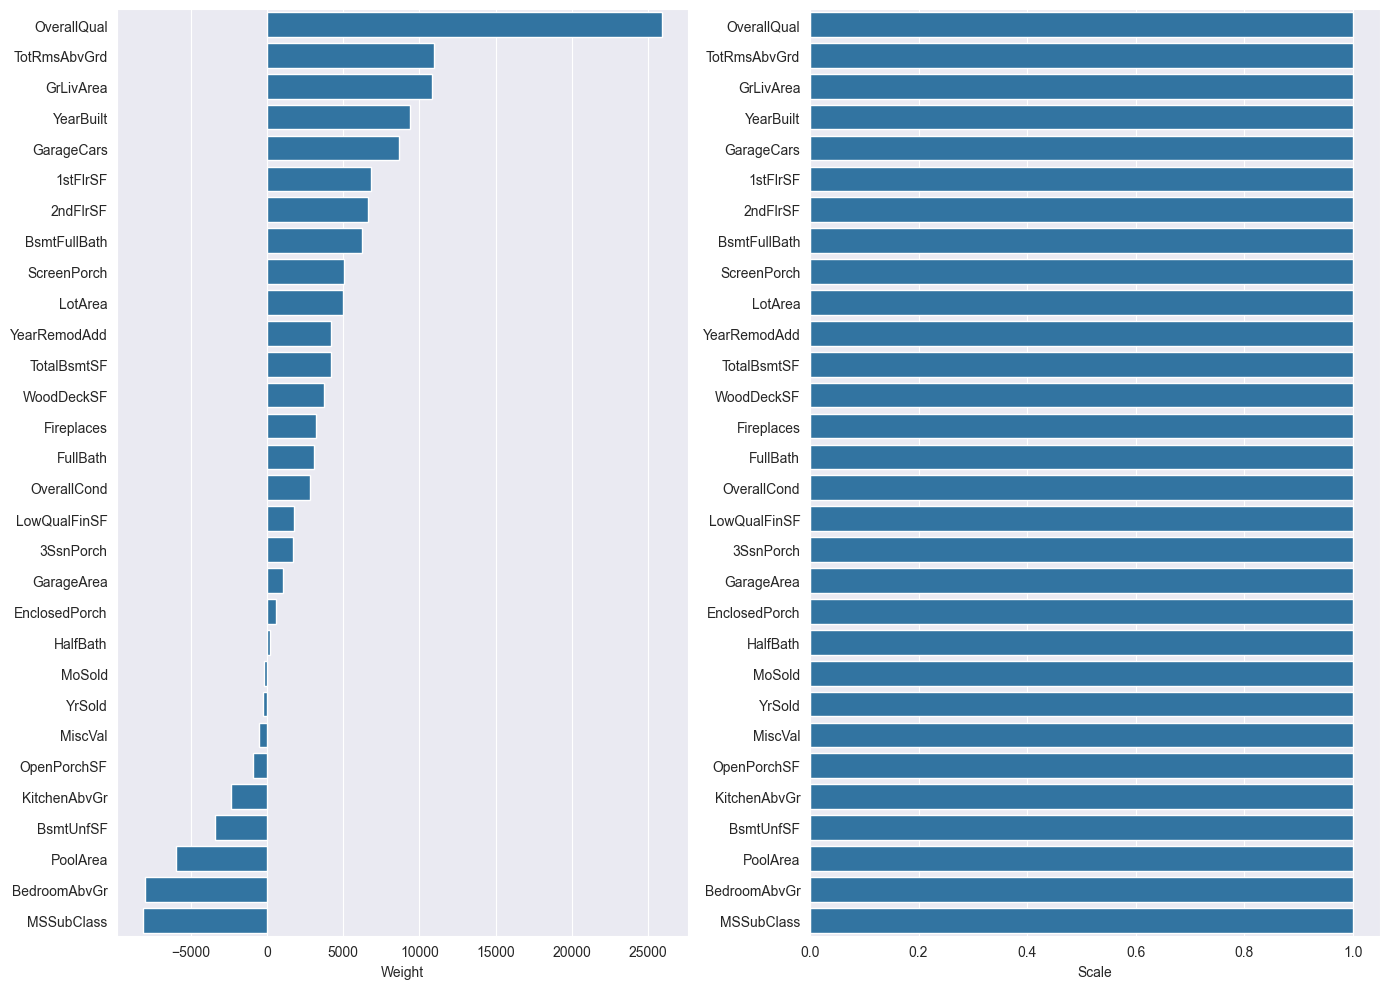

In [72]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=X_train.columns)
show_weights(X_train.columns, model.coef_, scales)

### GridSearch

Best alpha = 297.6351


Text(0, 0.5, 'CV score')

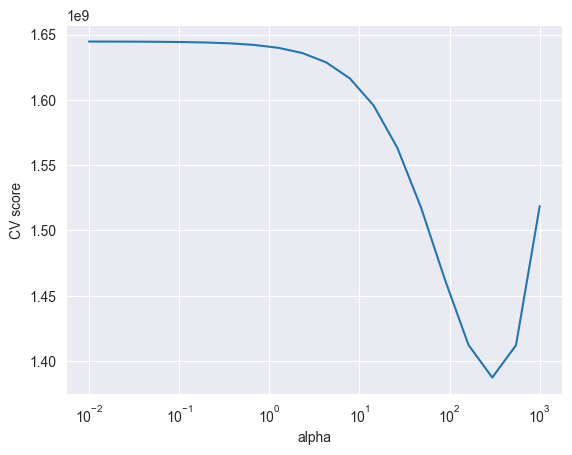

In [73]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

**Question**: Why don't we choose the regularization coefficient by train or test sets?

### l1 regularization

In [74]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred))

RMSE = 1614473738.4383


#### residuals distribution

<Axes: xlabel='SalePrice', ylabel='Density'>

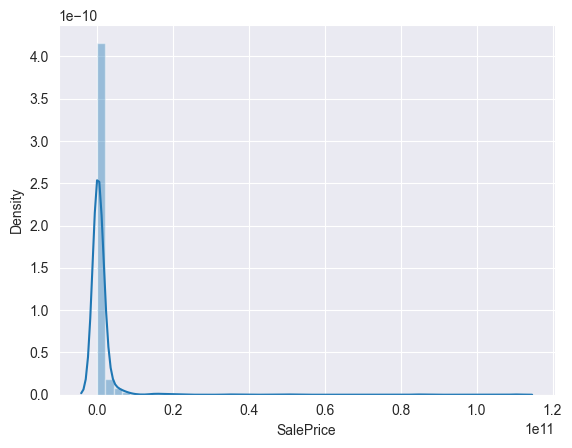

In [75]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

There are examples with large residuals. Let's drop them from the training set. For instance, drop the examples with residuals greater than 0.95-quantile.

In [76]:
mask = (error < np.quantile(error, 0.95))

In [77]:
model = Lasso().fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred))

Test RMSE = 1367074818.1835


In [78]:
X_train = X_train[mask]
y_train = y_train[mask]

<Axes: xlabel='SalePrice', ylabel='Density'>

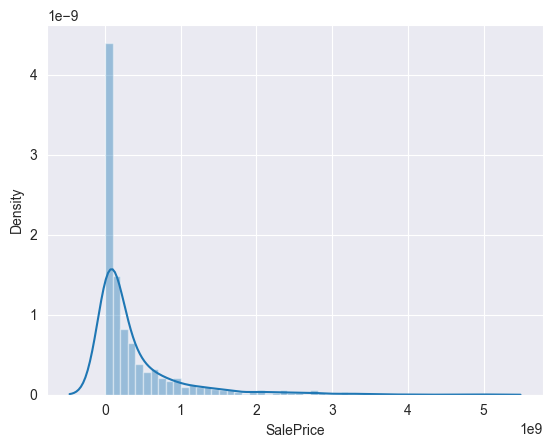

In [80]:
error = (y_train[mask] - model.predict(X_train[mask])) ** 2
sns.distplot(error)